In [14]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.Container {width:85% !important;}
div.CodeMirror {font-family:Consolas; font-size:13pt;}
div.output {font-size:13pt; font-weight : bold;}
div.input {font-family:Consolas; font-size:13pt;}
</style>
"""))

In [1]:
import warnings
warnings.filterwarnings(action = 'ignore')

import numpy as np # 1. 데이터 셋
import pandas as pd

from sklearn.preprocessing import MinMaxScaler # 2. 데이터 전처리
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential # 3. 모델 생성
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import metrics
from tensorflow.keras.callbacks import EarlyStopping

from matplotlib import pyplot as plt # 4. 모델 학습 & 평가

In [2]:
# ▶ 1. 데이터 셋 준비하기
redWine = pd.read_csv('data/winequality-red.csv', sep = ';')

redWine_x = redWine.iloc[:, :-1].to_numpy()
redWine_y = redWine.iloc[:, -1]

print('타겟변수가 될 와인 등급의 종류 :', redWine_y.unique())

타겟변수가 될 와인 등급의 종류 : [5 6 7 4 8 3]


In [3]:
# ▶ 2. 데이터 전처리
# 예측(입력)변수 scale 조정
# from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
scaler.fit(redWine_x)
redWine_x = scaler.transform(redWine_x)

# 결과(타겟)변수 원-핫 인코딩(라벨링 전환) 후 numpy 배열로 변환
redWine_y = pd.get_dummies(redWine_y).to_numpy()

redWine_y

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0]], dtype=uint8)

In [4]:
# 훈련셋과 검증셋
train_X, test_X, train_Y, test_Y = train_test_split(redWine_x, redWine_y, test_size = 0.3, 
                                                    random_state = 1)

print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(1119, 11) (1119, 6) (480, 11) (480, 6)


Epoch 1/50
5/5 [==============================] - 0s 36ms/step - loss: 1.7746 - accuracy: 0.1430 - val_loss: 1.7080 - val_accuracy: 0.1741
Epoch 2/50
5/5 [==============================] - 0s 6ms/step - loss: 1.6732 - accuracy: 0.2771 - val_loss: 1.6091 - val_accuracy: 0.3705
Epoch 3/50
5/5 [==============================] - 0s 14ms/step - loss: 1.5717 - accuracy: 0.4000 - val_loss: 1.5136 - val_accuracy: 0.3661
Epoch 4/50
5/5 [==============================] - 0s 6ms/step - loss: 1.4740 - accuracy: 0.4034 - val_loss: 1.4164 - val_accuracy: 0.3750
Epoch 5/50
5/5 [==============================] - 0s 6ms/step - loss: 1.3783 - accuracy: 0.3966 - val_loss: 1.3333 - val_accuracy: 0.3795
Epoch 6/50
5/5 [==============================] - 0s 6ms/step - loss: 1.3003 - accuracy: 0.4313 - val_loss: 1.2733 - val_accuracy: 0.3482
Epoch 7/50
5/5 [==============================] - 0s 6ms/step - loss: 1.2361 - accuracy: 0.4078 - val_loss: 1.2427 - val_accuracy: 0.3884
Epoch 8/50
5/5 [================

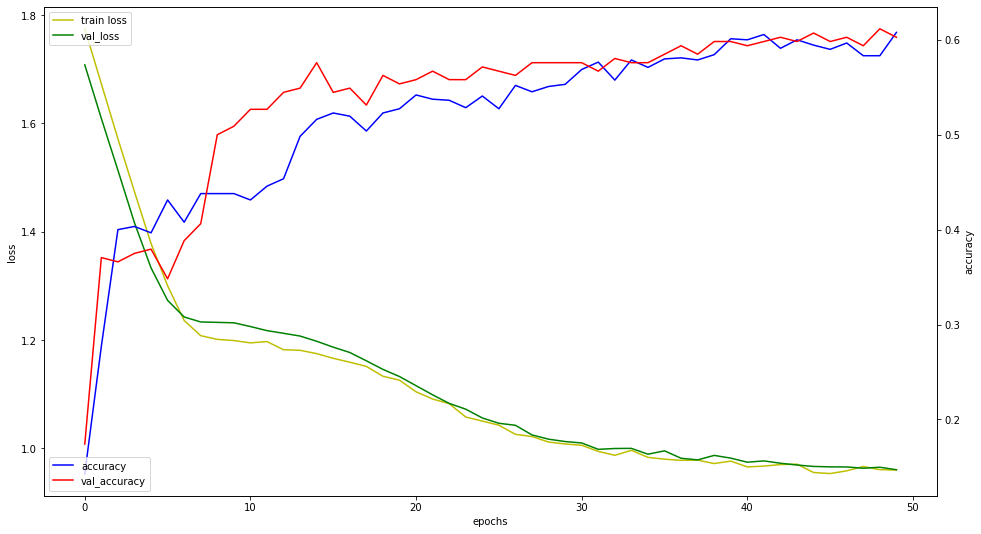

In [5]:
# ▶ 3. 모델 구성
model = Sequential()
model.add(Input(11)) # input_dim만 지정되어 있는 레이어

model.add(Dense(units = 50, activation = 'relu'))
model.add(Dense(units = 50, activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(units = 30, activation = 'relu'))
model.add(Dense(units = 6, activation = 'softmax'))


# ▶ 4. 모델 학습과정 설정
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])


# ▶ 5. 모델 학습
earlyStopping = EarlyStopping(patience = 20, monitor = 'val_loss')
hist = model.fit(train_X, train_Y, epochs = 50, batch_size = 200,
                 verbose = 1, callbacks = [earlyStopping], validation_split = 0.2)


# ▶ 6. 모델 학습과정 표시하기
fig, loss_ax = plt.subplots(figsize = (16, 9))

loss_ax.plot(hist.history['loss'], 'y', label = 'train loss')
loss_ax.plot(hist.history['val_loss'], 'g', label = 'val_loss')

loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc = 'upper left')

acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label = 'accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'r', label = 'val_accuracy')

acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc = 'lower left')

plt.show()

In [6]:
# ▶ 7. 모델 평가 및 성능지표
loss_and_acc = model.evaluate(test_X, test_Y)

print('Loss :', round(loss_and_acc[0]*100, 2), '%')
print('Accuracy :', round(loss_and_acc[1]*100, 2), '%')

15/15 [==============================] - 0s 2ms/step - loss: 0.9514 - accuracy: 0.5875
Loss : 95.14 %
Accuracy : 58.75 %


In [11]:
# 성능 지표 (crosstab)
pred = model.predict(test_X).argmax(axis = 1)+3
# pred = np.argmax(model.predict(test_X), axis = 1)+3

# real = test_Y.armax(axis = 1)+3
real = np.argmax(test_Y, axis = 1)+3

cross_tab = pd.crosstab(real, pred)
cross_tab.index.name = 'real'
cross_tab.columns.name = 'predict'

cross_tab

predict,5,6,7
real,,,
3,2,0,0
4,12,8,1
5,160,46,1
6,68,106,21
7,4,32,16
8,0,1,2


In [12]:
# 모델 사용하기
input_data = np.array([7.4, 0.7, 0,
                       1.0, 0.076, 11,
                       34, 0.9978, 3.51,
                       0.56, 9.4])

scaled_data = scaler.transform(input_data.reshape(1, 11))
np.argmax(model.predict(scaled_data), axis = 1) + 3

array([5], dtype=int64)